# Example 3#

LSSVM on small data sets: Variation of resulting models.
The synthetic data used for this purpose is the 1D Sinc function.

In [1]:
#Some imports
import matplotlib.pyplot as plt
import numpy as np
import random
import math
import scipy.stats as st
from sklearn.metrics import mean_squared_error, r2_score

from LSSVMRegression import LSSVMRegression

In [2]:
#Generating the synthetic data
Nmodels=100
Ndata=25
Nrem=5
x=np.array([np.random.uniform(low=-5,high=5,size=Ndata)]).T
y=np.sinc(x).ravel()  #create the associated targets, needs to be a 1D array

In [15]:
#create Nmodels (identical) rbf-models to train on different datasets

models=list()
datasets_x=list()
datasets_y=list()
for i in range(Nmodels):
    clfrbf=LSSVMRegression(
        gamma=100,       #set the gamma-hyper parameter equal to 1
        kernel='poly', #use the linear kernel
        sigma=1.0,
        c=1000,
        d=3,
            )
    #index=list(range(i,i+Nrem))
    index=random.sample(range(Ndata),Nrem)
    seti_x=np.array([np.delete(x,index)]).T
    #print(seti_x.shape," ",seti_x[0:5,:].ravel())
    seti_y=np.delete(y,index)
    clfrbf.fit(seti_x,seti_y) # train our model instance, aka solve the set of linear equations
    datasets_x.append(seti_x)
    datasets_y.append(seti_y)
    models.append(clfrbf)

In [16]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), st.sem(a)
    h = se * st.t.ppf((1 + confidence) / 2., n-1)
    cf=(1.0-confidence)*0.5
    qm = np.quantile(a,cf,interpolation='linear')
    qp = np.quantile(a,1.0-cf,interpolation='linear')
    return m, m-h, m+h, qm, qp

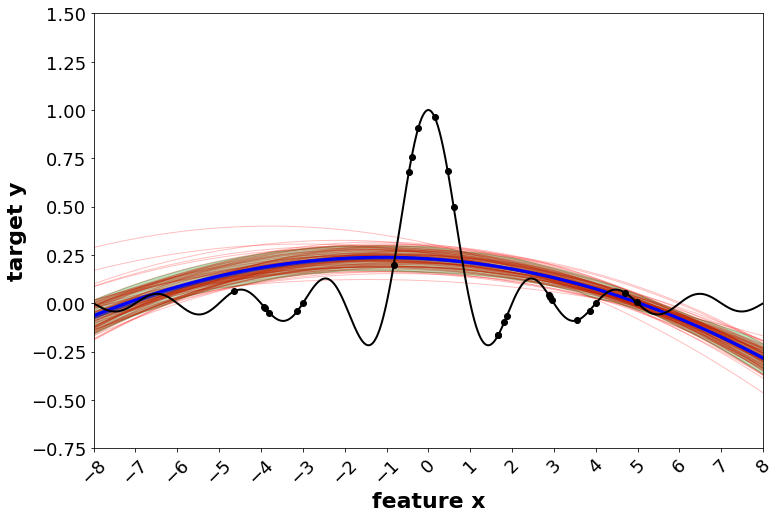

In [17]:
#generate a dens mesh
xmin=-8
xmax=8
Npts=2001
xPred=np.linspace((xmin,),(xmax,),Npts)
yExact=np.sinc(xPred).ravel()
yAvg=np.zeros(Npts)
CIlow=np.zeros(Npts)
CIhigh=np.zeros(Npts)
Qlow=np.zeros(Npts)
Qhigh=np.zeros(Npts)
# and predict
all_yPred=list()
yPred2D=np.zeros((Nmodels,Npts))
cnt=-1
for clfrbf in  models:
    cnt+=1
    yPred=clfrbf.predict(xPred)
    all_yPred.append(yPred)
    yPred2D[cnt]=yPred
    # The mean squared error (MAE) and The coefficient of determination R²: 1 is perfect prediction
    #print('MAE: %.3f    R²: %.3f' % (mean_squared_error(yExact, yPred), r2_score(yExact, yPred)))

for i in range(Npts):
    yAvg[i], CIlow[i], CIhigh[i], Qlow[i], Qhigh[i]= mean_confidence_interval(yPred2D[:,i],confidence=0.9)
    #print(yAvg[i], CIlow[i], CIhigh[i]," ",yPred2D[1:5,i])
    
#print("TYPE:" , type(xPred)," shape:",xPred.shape)
    
# Plot outputs
plt.figure(figsize=(12,8))
for yPred in all_yPred:
    plt.plot(xPred, yPred,   color='red'  ,linewidth=1, zorder=-1, alpha=0.25)

plt.fill_between(xPred.ravel(), CIlow, CIhigh, color='blue', zorder=0, alpha=.5)
plt.fill_between(xPred.ravel(), Qlow, Qhigh, color='green', zorder=0, alpha=.25)
plt.plot(xPred, yAvg,  color='blue',linewidth=3, zorder=0)

plt.plot(xPred, yExact,  color='black',linewidth=2, zorder=0)
plt.scatter(x, y,  color='black', zorder=1)

plt.axis([xmin,xmax,-0.75,1.5])
step=(xmax-xmin)/11.0
Xlst=list()
for a in np.arange(math.floor(xmin),math.ceil(xmax)+1,1.0):
    Xlst.append(a)
plt.xticks(Xlst,rotation=45,fontsize=18)
#plt.xticks([-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8])
plt.yticks([-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1.0,1.25,1.5],fontsize=18)
plt.xlabel("feature x",fontsize=22,fontweight="bold")
plt.ylabel("target y",fontsize=22,fontweight="bold")

plt.show()